# Exploring and comparing different mammogram datasets
<br>

**Datasets used:**
- Sample data from research Github
- CBIS-DDSM
- INbreast

### Prerequisites

In [1]:
import pandas as pd, numpy as np
import os, shutil
from glob import glob
from tqdm import tqdm
import pydicom as dicom
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from colorama import Fore, Back, Style
from mpl_toolkits.axes_grid1 import ImageGrid
import random
import imagesize
sns.set(style='dark')


Bad key savefig.frameon in file /home/frfa/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/frfa/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/frfa/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an update

In [2]:
# Directories with images
sample_dir = "../breast_cancer_classifier/sample_data/images"
cbis_dir = "../data/cbis-ddsm/all_test_img"
inbreast_dir = "../data/INbreast/png_versions"

In [3]:
# List of PNG images in base folders
def get_list_images(base):
    directory = os.fsencode(base)
    list_of_images = []
    for file in os.listdir(directory):
        if not file.endswith(b".png"):
            continue
        filename = os.fsdecode(file)
        list_of_images.append(base + "/" + filename)
    return list_of_images

In [4]:
sample_list = get_list_images(sample_dir)
cbis_list = get_list_images(cbis_dir)
inbreast_list = get_list_images(inbreast_dir)

### Image Example - Sample dataset

In [5]:
def show_img(path):
    img = cv2.imread(path,0)
    plt.figure(figsize=(10,10))
    plt.imshow(img,cmap='gray', vmin=0, vmax=255)

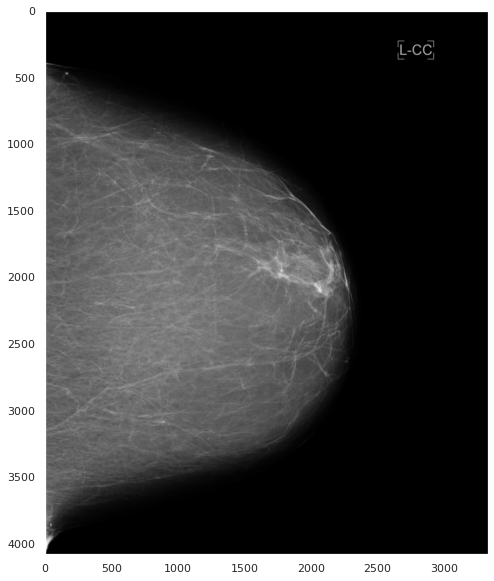

In [6]:
show_img(
    sample_list[0]
)

### Image grid

In [7]:
# Show image grid
def show_grid(files, row=3, col=3, IMG_PX_SIZE = 512):
    grid_files = random.sample(files, row*col)
    images     = []
    for image_path in tqdm(grid_files):
        
        ds          = cv2.resize(cv2.imread(image_path), dsize=(512,512))
        #ds          = dicom.dcmread(image_path)
        #pixel_array_numpy = ds.pixel_array
        #resized_img = resize(pixel_array_numpy, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
        images.append(ds)

    fig = plt.figure(figsize=(col*5, row*5))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(col, row),  # creates 2x2 grid of axes
                     axes_pad=0.05,  # pad between axes in inch.
                     )

    for ax, im in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

#### Sample Grid

100%|██████████| 9/9 [00:02<00:00,  4.41it/s]


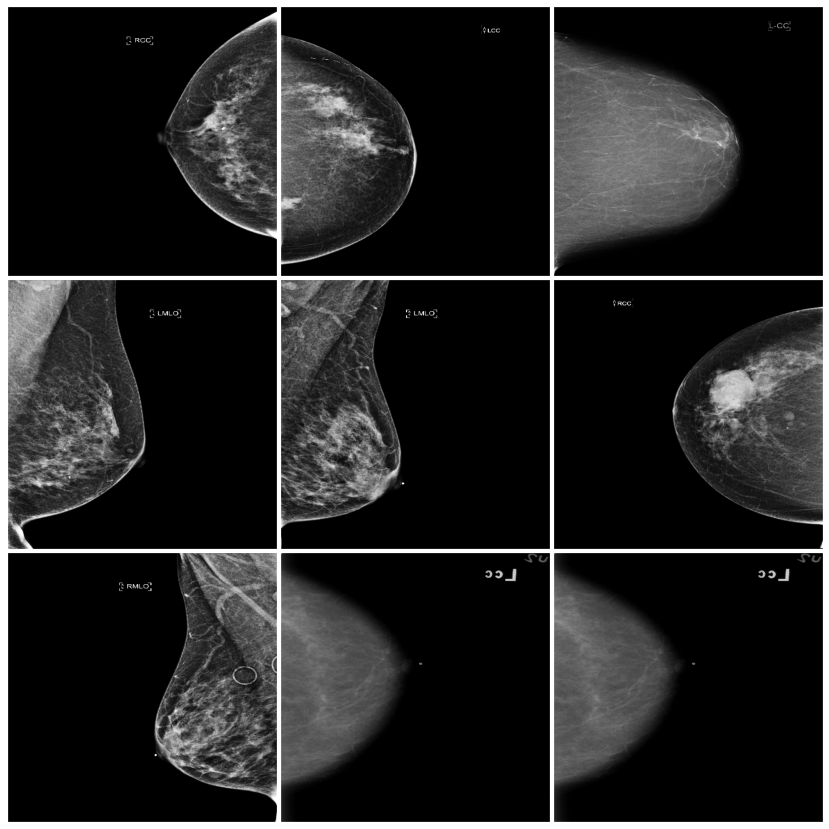

In [8]:
show_grid(sample_list)

#### CBIS DDSM Grid

100%|██████████| 9/9 [00:03<00:00,  2.80it/s]


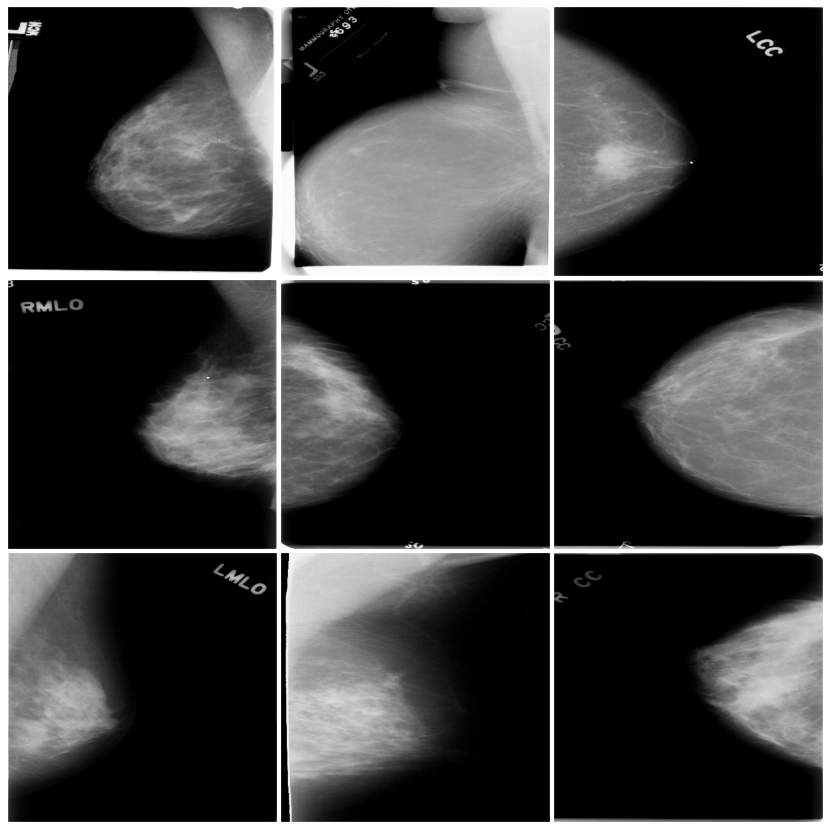

In [9]:
show_grid(cbis_list)

#### INbreast Grid

100%|██████████| 9/9 [00:01<00:00,  5.94it/s]


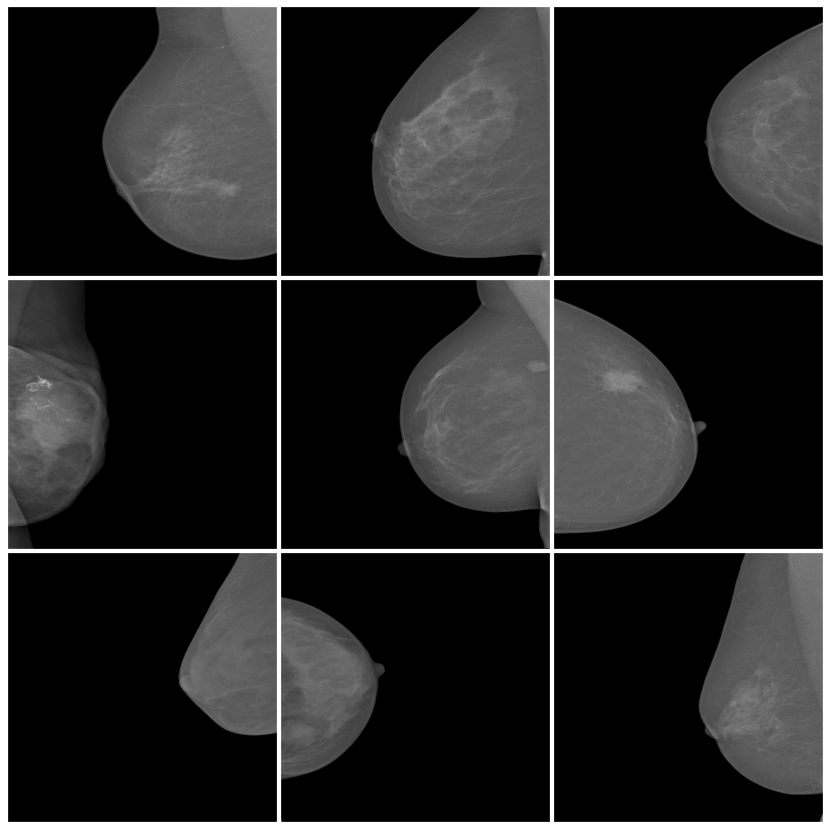

In [10]:
show_grid(inbreast_list)

## Dimension Distributions

In [11]:
def get_image_sizes(image_list):
    
    dim_list = []
    for img in image_list:
        dim = imagesize.get(img)
        dim_list.append(dim)
    
    return dim_list

In [12]:
def dim_distribution(widths, heights):
    # Weight and height distribution
    plt.figure(figsize=(12,8))
    sns.kdeplot(widths, shade=True, color='limegreen')
    sns.kdeplot(heights, shade=True, color='gold')
    plt.legend(['width','height'])

In [13]:
sample_dim_list = get_image_sizes(sample_list)
sample_widths, sample_heights = list(zip(*sample_dim_list))

cbis_dim_list = get_image_sizes(cbis_list)
cbis_widths, cbis_heights = list(zip(*cbis_dim_list))

inbreast_dim_list = get_image_sizes(inbreast_list)
inbreast_widths, inbreast_heights = list(zip(*inbreast_dim_list))

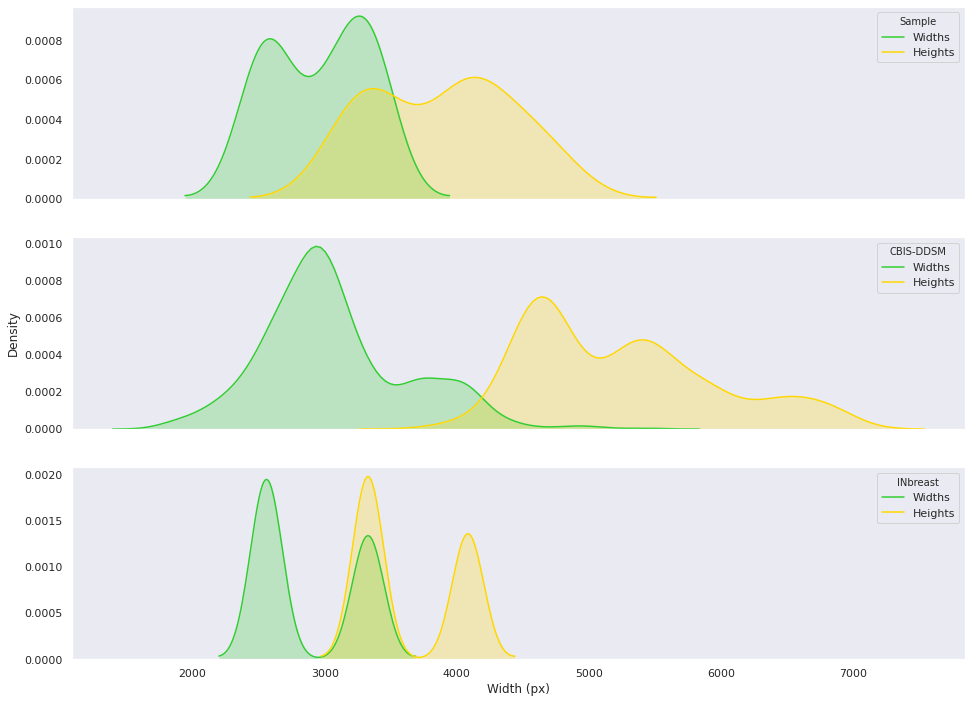

In [14]:
f, axarr = plt.subplots(3, figsize=(16,12), sharex=True)

sns.kdeplot(list(sample_widths), shade=True, color='limegreen', legend=False,ax=axarr[0], label="Widths")
sns.kdeplot(list(sample_heights), shade=True, color='gold', legend=False,ax=axarr[0], label="Heights")
axarr[0].legend(title = "Sample", loc="upper right")

sns.kdeplot(list(cbis_widths), shade=True, color='limegreen', legend=False,ax=axarr[1], label="Widths")
sns.kdeplot(list(cbis_heights), shade=True, color='gold', legend=False,ax=axarr[1], label="Heights")
axarr[1].legend(title = "CBIS-DDSM", loc="upper right")

sns.kdeplot(list(inbreast_widths), shade=True, color='limegreen', legend=False,ax=axarr[2], label="Widths")
sns.kdeplot(list(inbreast_heights), shade=True, color='gold', legend=False,ax=axarr[2], label="Heights")
axarr[2].legend(title = "INbreast", loc="upper right")

axarr[1].set_ylabel('Density')
axarr[2].set_xlabel('Width (px)')
plt.show()

## Feature Distributions

In [33]:
def get_all_pixel_values(image_list):
    
    image_list = random.choices(image_list, k=5)
    
    all_pixel_values = []
    for idx, img in enumerate(image_list):
        print(idx)
        print(img)
        im = Image.open(img, 'r')
        width, height = im.size
        pixel_values = list(im.getdata())
        all_pixel_values.extend(pixel_values) # Extend all pixel values with current image
    return all_pixel_values

In [34]:
sample_values = get_all_pixel_values(sample_list)
cbis_values = get_all_pixel_values(cbis_list)
inbreast_values = get_all_pixel_values(inbreast_list)

0
../breast_cancer_classifier/sample_data/images/4_R_CC.png
1
../breast_cancer_classifier/sample_data/images/3_R_CC.png
2
../breast_cancer_classifier/sample_data/images/2_R_MLO.png
3
../breast_cancer_classifier/sample_data/images/4_L_MLO.png
4
../breast_cancer_classifier/sample_data/images/1_R_CC.png
0
../data/cbis-ddsm/all_test_img/Mass-Test_P_01378_RIGHT_CC.png
1
../data/cbis-ddsm/all_test_img/Calc-Test_P_00495_RIGHT_CC.png
2
../data/cbis-ddsm/all_test_img/Calc-Test_P_00649_LEFT_CC.png
3
../data/cbis-ddsm/all_test_img/Calc-Test_P_00643_LEFT_MLO.png
4
../data/cbis-ddsm/all_test_img/Mass-Test_P_01645_RIGHT_CC.png
0
../data/INbreast/png_versions/20588190_8d0b9620c53c0268_MG_L_CC_ANON.png
1
../data/INbreast/png_versions/20588020_024ee3569b2605dc_MG_L_CC_ANON.png
2
../data/INbreast/png_versions/30011530_349323117bf0fd93_MG_R_ML_ANON.png
3
../data/INbreast/png_versions/50996228_8c1b2bd64ca4d778_MG_L_CC_ANON.png
4
../data/INbreast/png_versions/20588536_bf1a6aaadb05e3df_MG_L_ML_ANON.png


In [35]:
sample_values2 = list(filter((0).__ne__, sample_values))
cbis_values2 = list(filter((0).__ne__, cbis_values))
inbreast_values2 = list(filter((0).__ne__, inbreast_values))

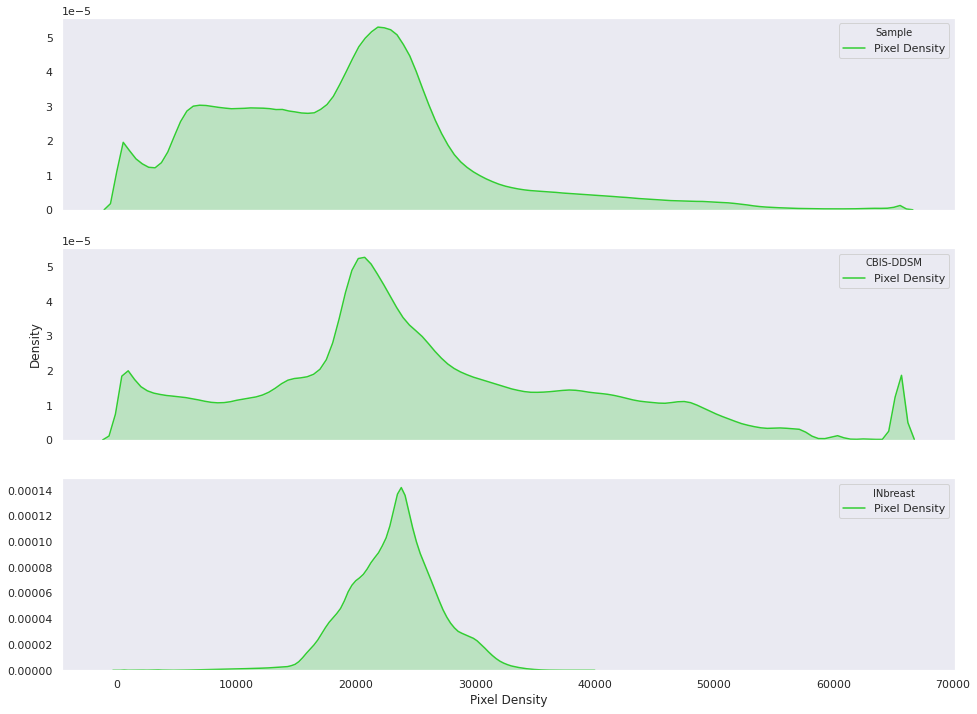

In [36]:
f, axarr = plt.subplots(3, figsize=(16,12), sharex=True)

sns.kdeplot(list(sample_values2), shade=True, color='limegreen', legend=False,ax=axarr[0], label="Pixel Density")
axarr[0].legend(title = "Sample", loc="upper right")

sns.kdeplot(list(cbis_values2), shade=True, color='limegreen', legend=False,ax=axarr[1], label="Pixel Density")
axarr[1].legend(title = "CBIS-DDSM", loc="upper right")

sns.kdeplot(list(inbreast_values2), shade=True, color='limegreen', legend=False,ax=axarr[2], label="Pixel Density")
axarr[2].legend(title = "INbreast", loc="upper right")

axarr[1].set_ylabel('Density')
axarr[2].set_xlabel('Pixel Density')
plt.show()

In [ ]:
from skimage.io import imread, imshow

In [ ]:
image = imread(sample_list[0], as_gray=True) 
features = np.reshape(image, image.shape[0]*image.shape[1])
features.shape, np.sort(features)[::-1]

In [ ]:
image = imread(cbis_list[0], as_gray=True) 
features = np.reshape(image, image.shape[0]*image.shape[1])
features.shape, np.sort(features)[::-1]

In [ ]:
image = imread(inbreast_list[0], as_gray=True) 
features = np.reshape(image, image.shape[0]*image.shape[1])
features.shape, np.sort(features)[::-1]

# Image Vectors

img2vec and dimensionality reduction

In [32]:
from img2vec_pytorch import Img2Vec
from PIL import Image

# Initialize Img2Vec with GPU
img2vec = Img2Vec(cuda=False)

# Read in an image (rgb format)
img = Image.open(sample_list[0])
img = Image.fromarray(np.uint8(img))

# Get a vector from img2vec, returned as a torch FloatTensor
vec = img2vec.get_vec(img, tensor=True)
# Or submit a list
#vectors = img2vec.get_vec(list_of_PIL_images)

RuntimeError: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]

In [20]:
img.dtype

AttributeError: 'PngImageFile' object has no attribute 'dtype'